In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('StudentsPerformance.csv')
print(df.head(n = 10),'\n')
print(df.tail(n = 3))


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                  

In [3]:
# Show dataset information 
print(df.info(), '\n')

# Show the columns and the index of the dataset
print(df.columns, '\n')
print(df.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None 

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object') 

RangeIndex(start=0, stop=1000, step=1)


In [4]:
# Show the shape of the dataset
print(df.shape,'\n')

# Show the dtype of each column
print(df.dtypes, '\n')

(1000, 8) 

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object 



In [5]:
# Modify the name of the columns in the dataset, replace '' with '_'
df.rename(columns = lambda column:'_'.join(column.title().split()), inplace = True)

# Create a repeating loop and show the distribution of the data in each column
for column,value in df.iteritems():
    print(column)
    print()
    print(value.value_counts().sort_values(ascending = False))
    print()


Gender

female    518
male      482
Name: Gender, dtype: int64

Race/Ethnicity

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64

Parental_Level_Of_Education

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_Of_Education, dtype: int64

Lunch

standard        645
free/reduced    355
Name: Lunch, dtype: int64

Test_Preparation_Course

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

Math_Score

65    36
62    35
59    32
69    32
73    27
      ..
24     1
26     1
28     1
33     1
0      1
Name: Math_Score, Length: 81, dtype: int64

Reading_Score

72    34
74    33
64    32
73    30
67    30
      ..
26     1
23     1
32     1
40     1
17     1
Name: Reading_Score, Length: 72, dtype: int64

Writing_Score

74    35
70    33
68    31
73    28
62    27
      ..
15     1
28 

In [6]:
# Store the name of the tests in a list 
exams = df.columns[-3:].to_list()

# Calculate the percentage (%) of missings in the columns of the dataset
print((df.isna().sum()/df.shape[0])*100)

# Show descriptive statistics of the dataset
print(df.describe().T)

Gender                         0.0
Race/Ethnicity                 0.0
Parental_Level_Of_Education    0.0
Lunch                          0.0
Test_Preparation_Course        0.0
Math_Score                     0.0
Reading_Score                  0.0
Writing_Score                  0.0
dtype: float64
                count    mean        std   min    25%   50%   75%    max
Math_Score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
Reading_Score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
Writing_Score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0


In [7]:
# Group the data by gender and later show the statistics described for the tests
gender = df.groupby('Gender')
metrics = [np.mean, np.median, np.var, np.std]
gender[exams].agg(metrics).T


Gender                    female        male
Math_Score    mean     63.633205   68.728216
              median   65.000000   69.000000
              var     239.985124  206.102695
              std      15.491453   14.356277
Reading_Score mean     72.608108   65.473029
              median   73.000000   66.000000
              var     206.733938  194.095945
              std      14.378245   13.931832
Writing_Score mean     72.467181   63.311203
              median   74.000000   64.000000
              var     220.369327  199.200248
              std      14.844842   14.113832

In [8]:
# Considering the gender variables and if the students took a preparatory course
gender_preparation = (df.groupby(['Gender', 'Test_Preparation_Course'])
                      [exams].agg(metrics)).T
gender_preparation


Gender                       female                    male            
Test_Preparation_Course   completed        none   completed        none
Math_Score    mean        67.195652   61.670659   72.339080   66.688312
              median      67.000000   62.000000   73.000000   67.000000
              var        202.901402  250.209527  202.260082  197.374847
              std         14.244346   15.818013   14.221817   14.049016
Reading_Score mean        77.375000   69.982036   70.212644   62.795455
              median      78.000000   71.000000   71.000000   63.000000
              var        161.175546  212.918595  186.827354  178.899393
              std         12.695493   14.591730   13.668480   13.375328
Writing_Score mean        78.793478   68.982036   69.793103   59.649351
              median      79.000000   70.000000   70.000000   60.000000
              var        149.836897  225.495172  168.800877  179.713778
              std         12.240788   15.016497   12.992339   13.405737

In [9]:
# Group the data by Race / Ethnicity and Education Level of the parents and calculate the average of the tests for these groups
group = (df.groupby(['Race/Ethnicity', 'Parental_Level_Of_Education'])[exams]
         .agg(np.mean))
group

Math_Score  Reading_Score  \
Race/Ethnicity Parental_Level_Of_Education                              
group A        associate's degree            61.000000      67.071429   
               bachelor's degree             67.166667      68.083333   
               high school                   60.444444      62.888889   
               master's degree               57.666667      64.666667   
               some college                  63.888889      65.777778   
               some high school              58.916667      62.083333   
group B        associate's degree            66.097561      69.585366   
               bachelor's degree             69.300000      72.950000   
               high school                   59.791667      63.458333   
               master's degree               67.166667      80.166667   
               some college                  63.189189      65.756757   
               some high school              61.815789      66.447368   
group C        associate's degree            66.730769      71.128205   
               bachelor's degree             68.150000      75.675000   
               high school                   60.906250      64.421875   
               master's degree               67.052632      70.526316   
               some college                  65.130435      69.420290   
               some high school              60.551020      65.632653   
group D        associate's degree            67.600000      70.540000   
               bachelor's degree             67.571429      70.142857   
               high school                   62.863636      64.409091   
               master's degree               72.521739      77.173913   
               some college                  68.731343      70.880597   
               some high school              66.760000      69.980000   
group E        associate's degree            74.897436      73.820513   
               bachelor's degree             76.555556      74.833333   
               high school                   70.772727      70.318182   
               master's degree               74.625000      82.125000   
               some college                  73.828571      72.628571   
               some high school              72.111111      69.555556   

                                            Writing_Score  
Race/Ethnicity Parental_Level_Of_Education                 
group A        associate's degree               63.571429  
               bachelor's degree                68.333333  
               high school                      60.500000  
               master's degree                  67.666667  
               some college                     65.000000  
               some high school                 58.583333  
group B        associate's degree               68.243902  
               bachelor's degree                71.650000  
               high school                      61.250000  
               master's degree                  77.166667  
               some college                     64.189189  
               some high school                 64.605263  
group C        associate's degree               70.269231  
               bachelor's degree                75.900000  
               high school                      61.656250  
               master's degree                  69.526316  
               some college                     68.869565  
               some high school                 63.285714  
group D        associate's degree               69.860000  
               bachelor's degree                71.892857  
               high school                      63.159091  
               master's degree                  79.739130  
               some college                     71.701493  
               some high school                 69.100000  
group E        associate's degree               73.205128  
               bachelor's degree                75.388889  
               high school 

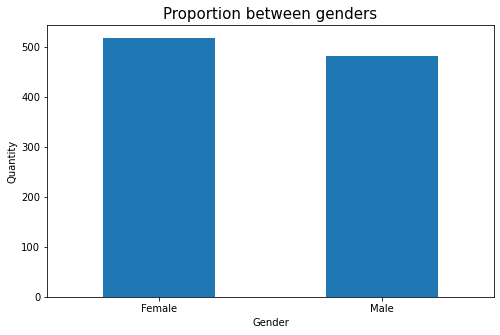

In [10]:
# Generate a graph for the gender ratio
df['Gender'].value_counts().plot(kind = 'bar', figsize = (8, 5))
plt.title('Proportion between genders', fontsize= 15)
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'], rotation = 0)
plt.ylabel('Quantity')
plt.xlabel('Gender')
plt.show()

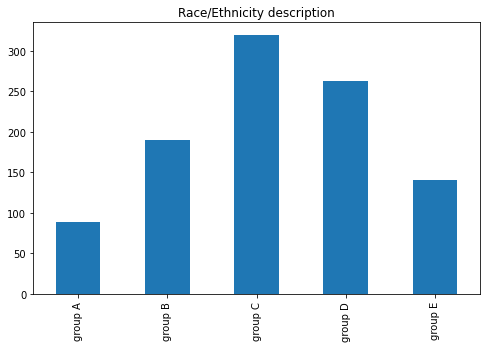

In [11]:
# Generate a bar graph to show the distribution of the Race / Ethnicity column
plt.figure(figsize = (8, 5))
df['Race/Ethnicity'].value_counts().sort_index().plot(kind = 'bar')
plt.title('Race/Ethnicity description');

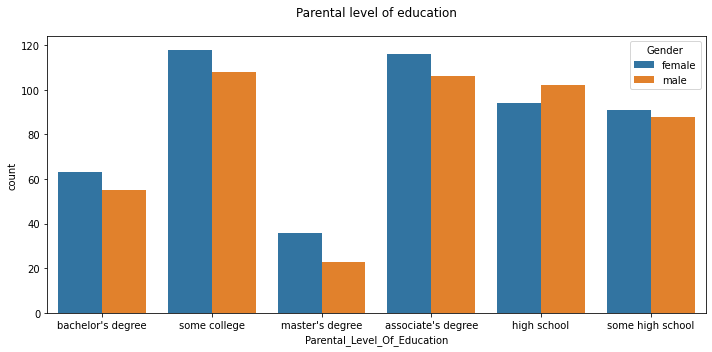

In [12]:
# Generate a bar graph to show the distribution of parents' educational level by gender
plt.figure(figsize = (10, 5))
sns.countplot(
    data = df,
    x = 'Parental_Level_Of_Education',
    hue= 'Gender'
)
plt.title('Parental level of education', pad = 20)
plt.tight_layout();

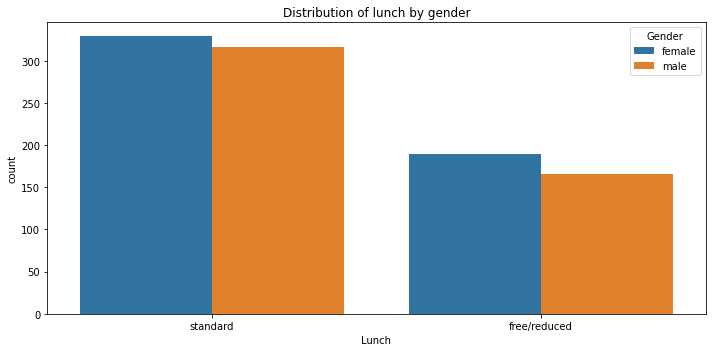

In [13]:
# Generate a bar graph to show the distribution of Lunch (column Lunch) by gender
plt.figure(figsize = (10, 5))
sns.countplot(
    data = df,
    x = 'Lunch',
    hue = 'Gender'
)
plt.title('Distribution of lunch by gender')
plt.tight_layout();

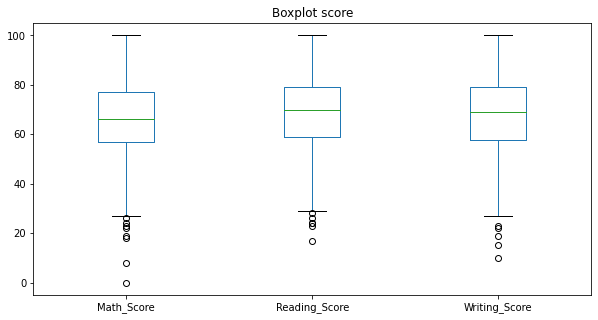

In [14]:
# Generate a boxplot to show the distribution of the notes
df[exams].plot(kind = 'box', figsize = (10,5))
plt.title('Boxplot score');

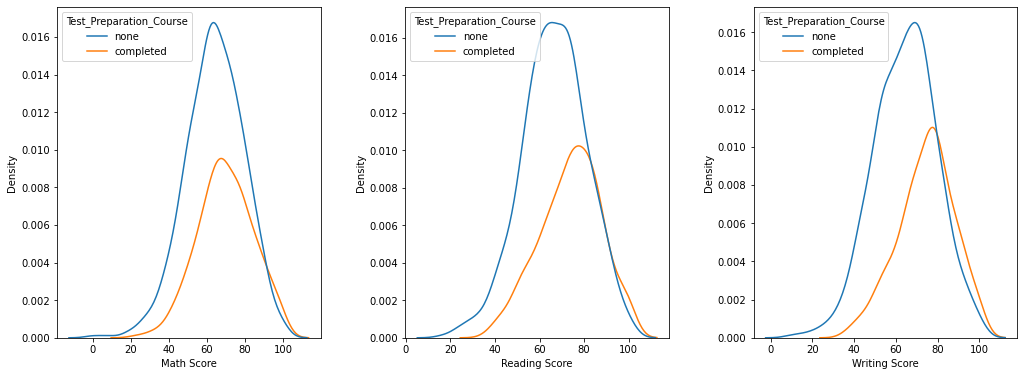

In [15]:
# Generate a graph with subplots with 3 columns

fig, (ax0, ax1, ax2) = plt.subplots(ncols = 3, figsize = (15,6))

sns.kdeplot(data = df, x = 'Math_Score', hue = 'Test_Preparation_Course', ax = ax0)
ax0.set_xlabel('Math Score')

sns.kdeplot(data = df, x = 'Reading_Score', hue = 'Test_Preparation_Course', ax = ax1)
ax1.set_xlabel('Reading Score')

sns.kdeplot(data = df, x = 'Writing_Score', hue = 'Test_Preparation_Course', ax = ax2)
ax2.set_xlabel('Writing Score')

plt.tight_layout(pad = 3.5)

In [16]:
# Calculate the correlation matrix and the covariance matrix
correlation_matrix = df.corr()
print(correlation_matrix,'\n')

cov_matrix = df.cov()
print(cov_matrix)

               Math_Score  Reading_Score  Writing_Score
Math_Score       1.000000       0.817580       0.802642
Reading_Score    0.817580       1.000000       0.954598
Writing_Score    0.802642       0.954598       1.000000 

               Math_Score  Reading_Score  Writing_Score
Math_Score     229.918998     180.998958     184.939133
Reading_Score  180.998958     213.165605     211.786661
Writing_Score  184.939133     211.786661     230.907992


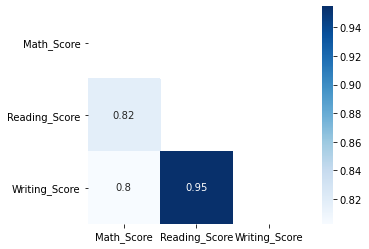

In [17]:
# Generate a heat map to analyze the relationship between the features of the dataset
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    correlation_matrix,
    annot = True,
    mask = mask,
    square = True,
    cmap = 'Blues');

In [19]:
# Use Seaborn to generate a pairplot of notes by gender
sns.pairplot(df, hue = 'Gender', plot_kws = {'alpha':0.5})